# Jaleel Walter Henry Savoy
## Wikipedia as a Higher Education Teaching Resource
### 06/28/2019

## Introduction
The objective of this report is to analyze data on how university faculty perceives and practices the use of Wikipedia as a teaching resource in higher education. During this report, the research goals will be to uncover relationships between the survey items and to accurately predict respondents' Wikipedia use behavior based on their background and their responses from the remaining survey items. 

## Data Source
The data was collected in 2012 from a self-report, online survey sent to 913 faculty members, both full- and part-time, at two universities in Spain, Universitat Oberta de Catalunya (UOC) and Universitat Pompeu Fabra (UPF); 800 responses were from UOC and 113 responses were from UPF. The data includes 53 features, with 10 of the features relating to the characteristics of the faculty members and the remaining 43 features are the response to the survey items. The 10 demographic features of the data set: age, gender, domain/field of study, possession of PhD, years of experiences, university, university position, whether the faculty member has a main position at another institution (for part-time faculty), other position (for part-time faculty), and whether the faculty is a registered Wikipedia user. The 13 groups of survey items: *Perceived Usefulness*, *Perceived Ease of Use*, *Perceived Enjoyment*, *Quality*, *Visibility*, *Social Image*, *Sharing attitude*, *Use behavior*, *Profile 2.0*, *Job Relevance*, *Behavior intention*, *Incentives*, and *Experience*. The individual survey items are provided in the appendix. 

All of the survey items were measured using a 5-point Likert-type scale. For survey items relating to levels of agreement, the scale ranged from "strongly disagree" to "strongly agree". For survey items relating to frequency, the scale ranged from "never" to "very often". 

One major limitation of the data was generated from an online, self-report study, so it can be inherently biased towards those faculty members that are likely to respond to such surveys. For this data set, the response rate at just UOC, which accounted for nearly 88% of respondents, was about 37.59%. The respondents of the survey will also have a different way of conceptualizing the scales of the survey and some may be more prone to exaggerated responses. Additionally, the survey data was only collected for two universities in Spain, so the results cannot be generalized to all of higher education.

### Handling Missing Data
To keep as much of the data as possible, while also addressing missing values, missing data imputation was performed for the survey item features (excluding the use behavior survey items) and the years experience feature. The missing values for the demographic factor features were treated as their own factor level so that they would be accounted for without affecting the valid responses for the other levels. Additionally, the missing values for the years experience feature were imputed with the median. The missing values for the survey items' features also used median imputation. Median imputation was preferred to mean imputation because it is a more robust measure of central tendency so it isn't as affected by outlying values.

### Training and Testing Split
A 50% stratified random split of the data based on a demographic cross variable of gender, domain, university, and Ph.D. possession is then used to generate the training and testing data sets. A stratified split was chosen over a simple random split in order to ensure each set was representative of the collected survey data.

## Methods Overview

### Principal Components Analysis
During the data exploration phase of this report, principal components analysis was performed. This procedure is a widely used feature extraction technique to uncover hidden structure in data and allows for high-dimensional data to be projected along axes where there is the most variation, which allows it to be used for dimensionality reduction. Often the most useful characteristics from the data are concentrated in the first few components and adding more of the components adds more information, but the additional components also add more noise.

### Logistic Regression
Logistic regression is a discriminative modeling approach to classification. This method directly estimates the posterior, conditional probabilities of classes given the values for predictor features. When using logistic regression, the assumption is that the posterior, conditional probabilities given a set of predictors is a nonlinear function of the predictor variables. This method learns a linear decision boundary.

### Linear Discriminant Analysis
In contrast to logistic regression, linear discriminant analysis is a generative modeling approach to classification that estimates the intra-class densities of the predictor variables given the classes, and that is then used to estimate the posterior, conditional probabilities of classes given predictors using they Bayes formula. There are two main assumptions for this method; each class is assumed to have an identical covariance matrix and the intra-class densities are assumed to be normal (Gaussian) distributions. Often, this method performs similarly to logistic regression, but there are situations where it can outperform or underperform in comparison to logistic regression; the assumption of normally distributed intra-class densities can have a large impactful on linear discriminant analysis performance. This method learns a linear decision boundary. 

### Quadratic Discriminant Analysis
Quadratic discriminant analysis is essentially the same as linear discriminant analysis, but instead of being able to only learn linear decision boundaries it can learn quadratic decision boundaries. The ability to learn quadratic decision boundaries allows quadratic discriminant analysis to be more flexible than logistic regression and linear discriminant analysis. Additionally, the quadratic discriminant analysis does not have the assumption of identical covariance matrices for each class. The increased flexibility offered by the method also results in higher variance than the less flexible methods.

## Preliminary Data Exploration

### Demographic Data Summarization
Of the 913 respondents, about 87.62% were from UOC and only 11.38% were from UPF. Overall, the respondents are about 57.50% male and 42.50% female, but the balance varied by academic domain; the Science and Engineering and Architecture domains were overwhelmingly male, but the other domains were more balanced with females being the majority in Arts and Humanities and Health Sciences. About 39.54% of respondents came from the Social Sciences domain, with Arts and Humanities being the next largest group with about 20%; only 8% and 6.13%  of respondents were from the Health Sciences and Science domains, respectively.

The youngest respondent was 23 and the oldest was 69, with the mean age being 42.25 and  the median age being 42; the standard deviation of the age feature was approximately 8.06 years. The respondents' minimum amount of experience was 0 years and the maximum was 43 years, with a mean of 10.87 years of experience and a median of 10 years of work experience; the standard deviation of years of experience was about 7.36 years. Around 46.44% of the respondents have attained a Ph.D., but interestingly the majority of respondents from UPF possessed a Ph.D.. The proportion of registered Wikipedia users was about the same for both institutions, with the overwhelming majority of the faculty not being registered users.

The corresponding visualizations for the data summary can be found in **Figure 1 - Figure 11** of the appendix.

### Principal Components Analysis
Principal components analysis was performed on the training set in order to find interesting relationships between the survey items, excluding the five user behavior survey items. Prior to performing the principal components analysis the data were scaled and centered. The survey items response data was collected using an ordinal 5-point Likert-type scale, but for this analysis it will be treated as a continuous feature. This poses some issues. One noticeable issue with treating the responses from survey items as continuous features is that this implies an equal distance between the levels, which can pose some issues. For example, if the participants in the study generally consider the distance between 1 and 3 to be larger than the distance between 3 and 5, then the assumption of equal distance between levels is problematic. Additionally, there is the added complication to interpretability of the values; for the scale used in some the survey items of this report, a value of 1 will represent never, which can be strange, and counterintuitive, when treated as a continuous value because there are values smaller than 1 but no frequency lower than never. For the principal components analysis, this assumption of equal distance between levels should be reasonably fine.

Looking at the results of the analysis, it is clear that a large majority of the variance explained in the data is concentrated in the first few principal components; the cumulative proportion of variance explained in the first four principal components is about 50.2% and in the first nine principal components is it about 70%, so out of the 28 principal components around nine of them can explain a significant proportion of the variance in the data. 

In **Figure 12** of the appendix, it there is a red vertical line at the 10th principal component and a green horizontal line that corresponds to a 2.5% marginal proportion of explained variance. Observing **Figure 12** it is clear that the gradient of the line preceding the 10th principal component is significantly different to the gradient proceeding the 10th principal component, and this point could be chosen as the 'elbow' of the line. Additionally, **Figure 13** and **Figure 14** of the appendix corroborate this decision. Moving to the right of the cut-off point in any of the three plots shows the same decreasing gradient past the cut-off point. Nearly 73% of the variance is explained in the first 10 components vs about 27% in the last 18 components. Using this information is was determined that the marginal benefits of including additional principal components were not worth the added dimensions and noise.

Overall, the first 10 principal components of the data are sufficient for this analysis, because they explain the overwhelming majority of the variance in the data and because the marginal benefits of adding more principal components are greatly diminished after the 10th principal component. 

By plotting the data in two dimensions, using the first two principal components, it is possible to identify with interesting pairings and relationships between the survey items. One prominent grouping of feature loadings is for the features Qu1, Qu2, Qu3, Qu5, PU1, PU2, and PU3; this grouping implies that these features are correlated with each other. This grouping covers nearly all of the survey items about quality, excluding Qu4, and nearly all the survey items about perceived usefulness, excluding PU3. This grouping is intuitive, because perceived usefulness and quality should be related. Additionally, it is understandable why Qu4 is not with this grouping; Qu4 is a noticeably opinionated survey item about Wikipedia being of lower quality than other resources, while the survey items in the grouping are related to positive attributes of Wikipedia.

The next most prominent grouping of feature loadings is for the features SA1, SA2, SA3, Pf1, Pf2, and Pf3; this grouping implies that these features are correlated with each other. This grouping covers all of the survey items about sharing attitude, profile 2.0, and job relevance. The survey items in this grouping all relate to collaboration, open platforms, and contributions to open education. This grouping is intuitive because you would assume that someone that views the sharing of educational resources as important would also contribute and participate in the creation and sharing of these resources. 
  
Interestingly, the feature Qu4 is out by itself with no other features nearby, which implies that it is not strongly correlated with any of the other features.

## Predicting Wikipedia Use Behavior
Now with a strong understanding of the data, it is time to move to the classification analysis. The objective is to accurately predict reported user behavior based on the provided demographic data as well as the principal components derived from the responses for other survey items. Instead of predicting all five use behaviors, this report will focus on the USE3 feature, which was related to whether the faculty recommended the use of Wikipedia to their students. There were some missing values for this feature, but since only nine observations were missing this response feature the observations were just omitted from the classification analysis. Since those observations are being omitted, it is important to look at a summary of them; for the omitted observations, the median age was about 47, four of the nine were female, six of the nine possessed a Ph.D., and 7 of the 9 were from UOC. Overall, the expected impact of omitting these observations should be small, because the remaining observations should provide enough information for the analysis.

For the analysis, the response will need to be transformed into a binary feature, so it is important to decide how to split the data and choose an appropriate cut-off point. Naturally, levels 1 and 2 would be in the one class and levels 4 and 5 would be in the other class, but choosing a class for the third (neutral) level is more complicated. In **Figure 16** of the appendix, it is clear that the most selected level is level 3. For this analysis, the third level will be included in the class with the fourth and fifth levels, because it seems to be more positive than negative; the third level implies the faculty is open to their students using Wikipedia, while the first two levels imply the faculty disagrees with recommending Wikipedia to their students. **Figure 17** shows the new binary response feature and the data is nearly evenly split between the two classes, "Yes" (levels 3, 4, and 5) and "No" (levels 1 and 2).

Additionally, a few interaction variables were created based on demographic features.

### Logistic Regression
To build the candidate logistic regression model, a bidirectional stepwise selection by AIC was performed, with a maximum of 1000 steps considered, to determine which features to include in the model. For this model, the coefficients are the estimated log odds of the probability that an observation belongs to the "Yes" class; interpreting the log odds for the principal components doesn't provide very interpretable information, but for the demographic features used included it can be informational. For example, the model estimates the log odds for the Lecturer level of the OTHERSTATUS feature to be 0.81736,  which corresponds to an odds ratio of about 2.265. This can be repeated for the other levels of the categorical predictors.

The features selected and their estimated coefficients are listed below. 

Predictor | Coefficient Estimate | Std. Error | z value | P-value  
--- | --- | --- | --- | ---
Intercept |                         0.67333|    1.10229  | 0.611 |0.541303    
PC1        |                         1.04233|    0.10852 |  9.605 | < 2e-16 
PC2         |                        0.17411 |   0.10611 |  1.641 |0.100810    
PC3          |                      -0.37900  |  0.11124 | -3.407 |0.000657 
PC5           |                      0.43776   | 0.13563 |  3.228 |0.001248  
PC7            |                    -0.58154 |   0.15287 | -3.804 |0.000142 
PC8             |                   -0.57320 |   0.16834 | -3.405 |0.000662 
PC11             |                  -0.46475 |   0.19604 | -2.371 |0.017754   
PC12              |                 -0.35950 |   0.21036 | -1.709 |0.087453   
OTHERSTATUSAssociate|                0.43051 |   0.83966  | 0.513 |0.608146    
OTHERSTATUSAssistant |              -1.29457 |   1.25268 | -1.033 |0.301398    
OTHERSTATUSLecturer   |              0.81736 |   1.09078 |  0.749 |0.453656    
OTHERSTATUSInstructor  |             0.19609 |   1.25647 |  0.156 |0.875981    
OTHERSTATUSAdjunct      |            1.28642  |  1.07534 |  1.196 |0.231583    
OTHERSTATUSOther         |           2.46274   | 0.99853 |  2.466 |0.013649   
OTHERSTATUSNA             |          0.76303   | 0.85590 |  0.892 |0.372660    
AGE.YEARSEXP               |         2.32189   | 1.31235 |  1.769 |0.076850   
DOMAIN.GENDERScience.Male   |       -0.34958   | 1.03111 | -0.339 |0.734582    
DOMAIN.GENDERHealth Sci.Male |      -1.60753   | 0.97257 | -1.653 |0.098358   
DOMAIN.GENDEREng/Arch.Male    |     -0.25349   | 0.72490 | -0.350 |0.726570   
DOMAIN.GENDERLaw/Politics.Male |    -1.51182   | 0.77238 | -1.957 |0.050306   
DOMAIN.GENDERSocial Sci.Male    |   -1.55252  |  0.64884 | -2.393 |0.016722   
DOMAIN.GENDERNA.Male             |   8.62026 |1029.07778 |  0.008 |0.993316    
DOMAIN.GENDERArts/Hum.Female     |  -0.97820  |  0.70524 | -1.387 |0.165428    
DOMAIN.GENDERScience.Female      |   1.12480 |  1.73703  | 0.648 |0.517283    
DOMAIN.GENDERHealth Sci.Female   |  -0.11864 |   0.90262 | -0.131 | 0.895427    
DOMAIN.GENDEREng/Arch.Female     |  -2.25933    |1.16685 | -1.936 |0.052835   
DOMAIN.GENDERLaw/Politics.Female |  -1.45283   | 0.84612 | -1.717 |0.085970   
DOMAIN.GENDERSocial Sci.Female   |  -2.33479  |  0.67187 | -3.475 |0.000511 
PC1.PC2                          |  -0.13403 |   0.05445 | -2.461 |0.013837   
PC2.PC3                          |  -0.14926|    0.07662 | -1.948 |0.051416   

The results of the model were pretty promising; the model is able to accurately predict the "Yes" class, and it is also fair at predicting the "No" class. On the testing set, the model had a misclassification rate of ~21%, a specificity measure of ~66.96%, a sensitivity measure of ~91.94%, a positive predictive value of 72.12%, and a negative predictive value of ~ 89.94%. 

Classification Measure | Testing Performance
--- | ---
Correct Classification Rate |  0.789954337899543
Misclassification Rate | 0.210045662100457
Specificity |  0.669603524229075
Sensitvity |  0.919431279620853
Positive Predictive Value |  0.721189591078067
Negative Predictive Value | 0.899408284023669

### Linear Discriminant Analysis
To fit the linear discriminant model, a subset of the predictor features was selected. Many of the predictors were carried over from the logistic regression model, but there were some predictor additions and some predictor omissions.

The features selected and their estimated coefficients are listed below. 

Feature | Linear Discriminant Coefficient
--- | ---
PC1    |       0.435735194
PC2    |       0.145526024
PC3    |      -0.233320292
PC4    |       0.035109321
PC5    |       0.111848014
PC7    |      -0.237531489
PC8    |      -0.118948647
PC11   |      -0.191150981
PC12   |      -0.148797193
GENDERFemale | -0.250007458
AGE          | -0.004343579

The results of the linear discriminant analysis on the test data were noticeably better than the logistic regression, but they were still performed pretty similarly, as expected; the main difference is that this model was able to get fourteen additional correct predictions of the "No" class and three more correct predictions of the "Yes" class. This model was able to achieve a misclassification rate of ~16.67%, a specificity measure of ~74.01%, a sensitivity measure of ~93.36%, a positive predictive value of ~76.95%, and a negative predictive value of ~92.31%.

Classification Measure | Testing Performance
--- | ---
Correct Classification Rate |  0.833333333333333
Misclassification Rate | 0.166666666666667
Specificity |  0.740088105726872
Sensitvity |  0.933649289099526
Positive Predictive Value |  0.769531250000000
Negative Predictive Value | 0.923076923076923

### Quadratic Discriminant Analysis
To fit the linear discriminant model, a subset of the predictor features was selected. Some of the predictors were carried over from the previous two models, but there were some changes. This model used many of the principal components (PC1, PC2, PC3, PC4, PC7, PC8), the product of PC1 and PC2, the product of PC1 and PC3, age, gender, possession of Ph.D., and the interaction between gender and institution.

The results of the linear discriminant analysis on the test data were slightly worse than the logistic regression, which was not what was expected; the main difference is that this model has difficulty accurately and precisely predicting of the "No" class. The model performs pretty well with predicting the "Yes" class. This model was able to achieve a misclassification rate of ~23.97%, a specificity measure of ~63%, a sensitivity measure of ~90.05%, a positive predictive value of ~69.34%, and a negative predictive value of ~87.20%.

Classification Measure | Testing Performance
--- | ---
Correct Classification Rate |  0.76027397260274
Misclassification Rate | 0.23972602739726
Specificity |  0.629955947136564
Sensitvity |  0.900473933649289
Positive Predictive Value |  0.693430656934307
Negative Predictive Value | 0.871951219512195

## Conclusions
Regarding the exploration phase of the project, two prominent groupings of survey items were identified and during the classification portion, three candidate models were fitted with fair predictive capabilities. Overall, the linear discriminant analysis model performed the best, and it would be a suitable solution to the research problem of the report, which was to accurately predict the Wikipedia use behavior from the available demographic data and remaining survey item responses. The linear discriminant analysis model was had better classification performance measure across the board, and was able to most accurately predict both classes of the response while minimizing misclassifications. One reason that quadratic discriminant analysis model underperformed compared to the linear discriminant analysis is due to having a substantially higher variance; with the limited number of training observations, less than 500, the lower variance of the linear discriminant analysis model would have been very beneficial. 

One potential way to make the analysis better and more generalized to higher education would be to collect more data. A major limitation of this analysis is that only two universities, both in Spain, were surveyed. Also, by surveying more faculty members at different institutions, a larger data set would be generated which could allow for the use classification models that are more flexible and that make fewer assumptions about the functional form of the predictor function.

## Citations
Hadley Wickham (2017). tidyverse: Easily Install and Load the 'Tidyverse'. R package version 1.2.1. https://CRAN.R-project.org/package=tidyverse

Meseguer, A., Aibar, E., Lladós, J., Minguillón, J., Lerga, M. (2015). "Factors that influence the teaching use of Wikipedia in Higher Education". JASIST, Journal of the Association for Information Science and Technology. ISSN: 2330-1635. doi: 10.1002/asi.23488. 

Revelle, W. (2018) psych: Procedures for Personality and Psychological Research, Northwestern University, Evanston, Illinois, USA, https://CRAN.R-project.org/package=psych Version = 1.8.12.

Venables, W. N. & Ripley, B. D. (2002) Modern Applied Statistics with S. Fourth Edition. Springer, New York. ISBN 0-387-95457-0

Yuan Tang, Masaaki Horikoshi, and Wenxuan Li. "ggfortify: Unified Interface to Visualize Statistical Result of Popular R Packages." The R Journal 8.2 (2016): 478-489.

## Appendix

### Survey Items
* Perceived Usefulness 
    * PU1: The use of Wikipedia makes it easier for students to develop new skills 
    * PU2: The use of Wikipedia improves students' learning 
    * PU3: Wikipedia is useful for teaching 

* Perceived Ease of Use 
    * PEU1: Wikipedia is user-friendly 
    * PEU2: It is easy to find in Wikipedia the information you seek 
    * PEU3: It is easy to add or edit information in Wikipedia 

* Perceived Enjoyment 
    * ENJ1: The use of Wikipedia stimulates curiosity 
    * ENJ2: The use of Wikipedia is entertaining 

* Quality 
    * QU1: Articles in Wikipedia are reliable 
    * QU2: Articles in Wikipedia are updated 
    * QU3: Articles in Wikipedia are comprehensive 
    * QU4: In my area of expertise, Wikipedia has a lower quality than other educational resources 
    * QU5: I trust in the editing system of Wikipedia 

* Visibility 
    * VIS1: Wikipedia improves visibility of students' work 
    * VIS2: It is easy to have a record of the contributions made in Wikipedia 
    * VIS3: I cite Wikipedia in my academic papers 

* Social Image 
    * IM1: The use of Wikipedia is well considered among colleagues 
    * IM2: In academia, sharing open educational resources is appreciated 
    * IM3: My colleagues use Wikipedia 

* Sharing attitude 
    * SA1: It is important to share academic content in open platforms 
    * SA2: It is important to publish research results in other media than academic journals or books 
    * SA3: It is important that students become familiar with online collaborative environments 

* Use behaviour 
    * USE1: I use Wikipedia to develop my teaching materials 
    * USE2: I use Wikipedia as a platform to develop educational activities with students 
    * USE3: I recommend my students to use Wikipedia 
    * USE4: I recommend my colleagues to use Wikipedia 
    * USE5: I agree my students use Wikipedia in my courses 

* Profile 2.0 
    * PF1: I contribute to blogs 
    * PF2: I actively participate in social networks 
    * PF3: I publish academic content in open platforms 

* Job relevance 
    * JR1: My university promotes the use of open collaborative environments in the Internet 
    * JR2: My university considers the use of open collaborative environments in the Internet as a teaching merit 

* Behavioral intention 
    * BI1: In the future I will recommend the use of Wikipedia to my colleagues and students 
    * BI2: In the future I will use Wikipedia in my teaching activity 

* Incentives 
    * INC1: To design educational activities using Wikipedia, it would be helpful: a best practices guide 
    * INC2: To design educational activities using Wikipedia, it would be helpful: getting instruction from a colleague 
    * INC3: To design educational activities using Wikipedia, it would be helpful: getting specific training 
    * INC4: To design educational activities using Wikipedia, it would be helpfull: greater institutional recognition 

* Experience 
    * EXP1: I consult Wikipedia for issues related to my field of expertise 
    * EXP2: I consult Wikipedia for other academic related issues 
    * EXP3: I consult Wikipedia for personal issues 
    * EXP4: I contribute to Wikipedia (editions, revisions, articles improvement...) 
    * EXP5: I use wikis to work with my students 

In [172]:
# # Import Data and Relevant Packages
#################################################################################################
## Import relevant packages
suppressPackageStartupMessages(library(tidyverse, warn.conflicts=FALSE))
suppressPackageStartupMessages(library(ggfortify, warn.conflicts=FALSE))
suppressPackageStartupMessages(library(psych, warn.conflicts=FALSE))
suppressPackageStartupMessages(library(caret, warn.conflicts=FALSE))

theme_set(theme_minimal())

## Set seed for reproducibility
set.seed(12321)

## Import Data
wiki = read.csv("wiki4HE.csv", header=T, sep=";", na.strings="?")

## Convert columns to their appropriate data types
unordered.factor.columns <- c("GENDER", "DOMAIN", "PhD", "UNIVERSITY", "USERWIKI", 
                             "UOC_POSITION", "OTHER_POSITION", "OTHERSTATUS")
wiki[unordered.factor.columns] <- lapply(wiki[unordered.factor.columns], as.factor)

## Rename the levels of the columns
levels(wiki$GENDER) <- c("Male", "Female")
levels(wiki$DOMAIN) <- c("Arts/Hum", "Science", "Health Sci", "Eng/Arch", "Law/Politics", "Social Sci")
levels(wiki$PhD) <- c("No", "Yes")
levels(wiki$UNIVERSITY) <- c("UOC", "UPF")
levels(wiki$UOC_POSITION) <- c("Professor", "Associate", "Assistant", "Lecturer", "Instructor", "Adjunct")
levels(wiki$USERWIKI) <- c("No", "Yes")
levels(wiki$OTHER_POSITION) <- c("Yes", "No")
levels(wiki$OTHERSTATUS) <- c("Professor", "Associate", "Assistant", "Lecturer", "Instructor", "Adjunct", "Other")

## Handle NA for years experience
wiki$YEARSEXP[is.na(wiki$YEARSEXP)] <- median(wiki$YEARSEXP[!is.na(wiki$YEARSEXP)])

## Handle NA for demographic factor features  
wiki$DOMAIN <- addNA(wiki$DOMAIN)
wiki$UOC_POSITION <- addNA(wiki$UOC_POSITION)
wiki$OTHER_POSITION <- addNA(wiki$OTHER_POSITION)
wiki$OTHERSTATUS <- addNA(wiki$OTHERSTATUS)
wiki$USERWIKI <- addNA(wiki$USERWIKI)

## Handle NA for survey items
for (i in 11:43){
    if (i %in% c(33:37)){
       next
    } else {
        wiki[is.na(wiki[,i]),i] <- round(median(wiki[,i], na.rm=TRUE))
    }
}


## Preview the first 5 rows
head(wiki, 5)

## Preview 10 random rows
(wiki[sample(nrow(wiki), 5), ])

## Preview the last 5 rows
tail(wiki, 5)

AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
40,Male,Science,Yes,14,UOC,Associate,NA,NA,No,...,3,5,5,5,5,4,4,4,1,2
42,Male,Law/Politics,Yes,18,UOC,Associate,NA,NA,No,...,2,4,4,3,4,2,2,4,2,4
37,Male,Eng/Arch,Yes,13,UOC,Assistant,NA,NA,No,...,1,5,3,5,5,2,2,2,1,3
40,Male,Eng/Arch,No,13,UOC,Assistant,NA,NA,No,...,3,3,4,4,3,4,4,3,3,4
51,Male,Social Sci,No,8,UOC,Assistant,NA,NA,Yes,...,5,5,5,4,4,5,5,5,4,4


,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
771,30,Female,Social Sci,No,2,UOC,Adjunct,No,NA,Yes,...,3,3,3,3,3,3,3,3,3,4
390,44,Male,Social Sci,Yes,10,UOC,Adjunct,Yes,Other,No,...,2,3,3,2,2,1,3,4,1,4
880,35,Female,Health Sci,No,3,UPF,NA,NA,Other,No,...,1,1,1,1,1,2,1,2,1,1
57,52,Male,Arts/Hum,Yes,10,UOC,Assistant,NA,NA,Yes,...,4,4,5,3,3,4,5,5,2,3
549,46,Female,Social Sci,No,7,UOC,Adjunct,No,NA,No,...,2,4,2,2,3,2,2,3,3,2


,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
909,43,Male,Law/Politics,Yes,21,UPF,NA,NA,Associate,No,...,2,2,2,2,2,NA,NA,NA,NA,NA
910,53,Male,Social Sci,No,25,UPF,NA,NA,Adjunct,No,...,4,4,3,3,4,4,4,4,1,1
911,39,Male,Law/Politics,Yes,9,UPF,NA,NA,Lecturer,No,...,2,5,4,3,NA,5,5,5,4,1
912,40,Male,Health Sci,Yes,10,UPF,NA,NA,Associate,No,...,5,1,5,2,2,4,4,2,1,1
913,41,Female,Health Sci,Yes,12,UPF,NA,NA,Associate,No,...,3,3,NA,3,3,2,3,3,1,1


In [173]:
#################################################################################################
# Data Preprocessing
#################################################################################################
## Set seed for reproducibility
set.seed(12321)

## Get binary response
new.use3 <- factor(wiki$Use3, ordered=TRUE)
wiki$Use3 <- new.use3

## Get training data and test data
train.index <- createDataPartition(with(wiki, interaction(GENDER,
                                                          DOMAIN,
                                                          UNIVERSITY,
                                                          PhD)),
                                   p = .50, list = FALSE)
train.data <- wiki[ train.index,]
test.data  <- wiki[-train.index,]

Warning message in createDataPartition(with(wiki, interaction(GENDER, DOMAIN, UNIVERSITY, :
"Some classes have no records ( Female.NA.UOC.No, Female.Science.UPF.No, Male.Law/Politics.UPF.No, Male.NA.UPF.No, Female.NA.UPF.No, Female.NA.UOC.Yes, Male.NA.UPF.Yes, Female.NA.UPF.Yes ) and these will be ignored"Warning message in createDataPartition(with(wiki, interaction(GENDER, DOMAIN, UNIVERSITY, :
"Some classes have a single record ( Male.NA.UOC.No, Male.Health Sci.UPF.No, Female.Eng/Arch.UPF.No, Male.NA.UOC.Yes, Female.Law/Politics.UPF.Yes ) and these will be selected for the sample"

      AGE           GENDER             DOMAIN     PhD         YEARSEXP    
 Min.   :23.00   Male  :525   Arts/Hum    :183   No :489   Min.   : 0.00  
 1st Qu.:36.00   Female:388   Science     : 56   Yes:424   1st Qu.: 5.00  
 Median :42.00                Health Sci  : 73             Median :10.00  
 Mean   :42.25                Eng/Arch    :137             Mean   :10.85  
 3rd Qu.:47.00                Law/Politics:101             3rd Qu.:15.00  
 Max.   :69.00                Social Sci  :361             Max.   :43.00  
                              NA          :  2                            
 UNIVERSITY     UOC_POSITION OTHER_POSITION    OTHERSTATUS  USERWIKI 
 UOC:800    Professor :  3   Yes:268        NA       :540   No :784  
 UPF:113    Associate : 68   No :384        Associate:130   Yes:125  
            Assistant : 50   NA :261        Other    :107   NA :  4  
            Lecturer  : 18                  Adjunct  : 41            
            Instructor:  2                  Lectur

      PU1             PU2             PU3             PEU1      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:3.000   1st Qu.:4.000  
 Median :3.000   Median :3.000   Median :3.000   Median :5.000  
 Mean   :3.137   Mean   :3.148   Mean   :3.448   Mean   :4.359  
 3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:5.000  
 Max.   :5.000   Max.   :5.000   Max.   :5.000   Max.   :5.000  
                                                                
      PEU2            PEU3            ENJ1            ENJ2      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:4.000   1st Qu.:3.000   1st Qu.:3.000   1st Qu.:3.000  
 Median :4.000   Median :3.000   Median :4.000   Median :4.000  
 Mean   :4.045   Mean   :3.343   Mean   :3.796   Mean   :3.825  
 3rd Qu.:5.000   3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:4.000  
 Max.   :5.000   Max.   :5.000   Max.   :5.000   Max.   :5.000  
                         

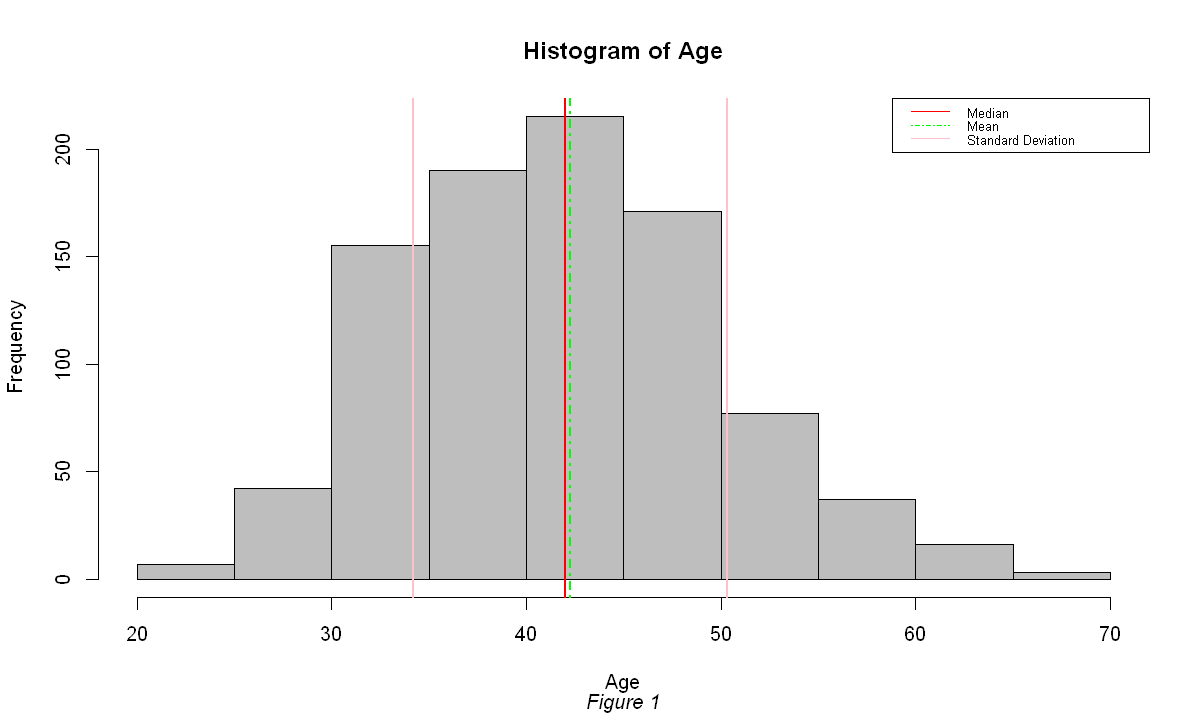

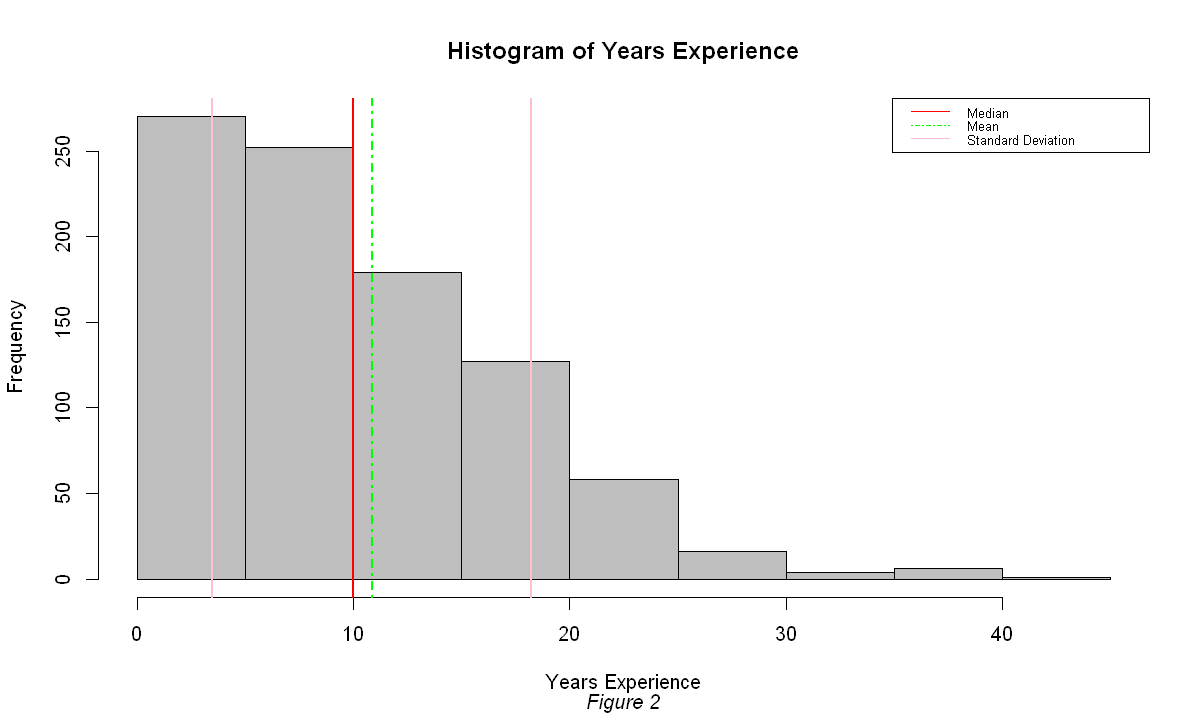

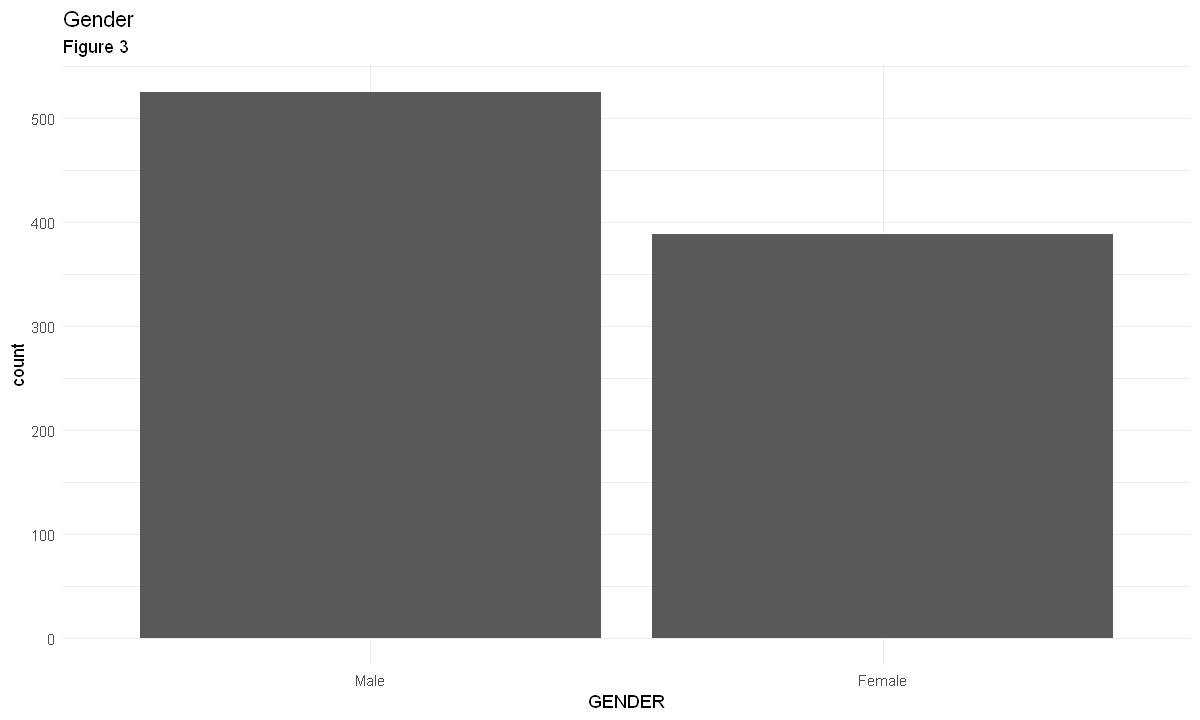

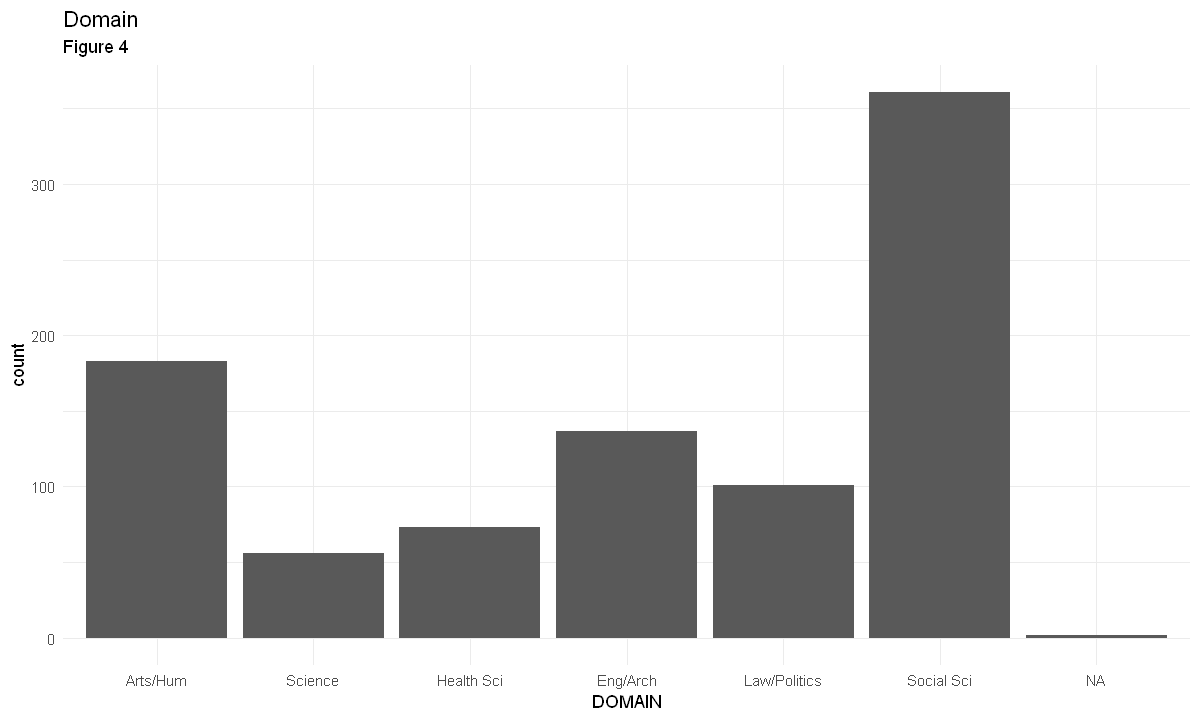

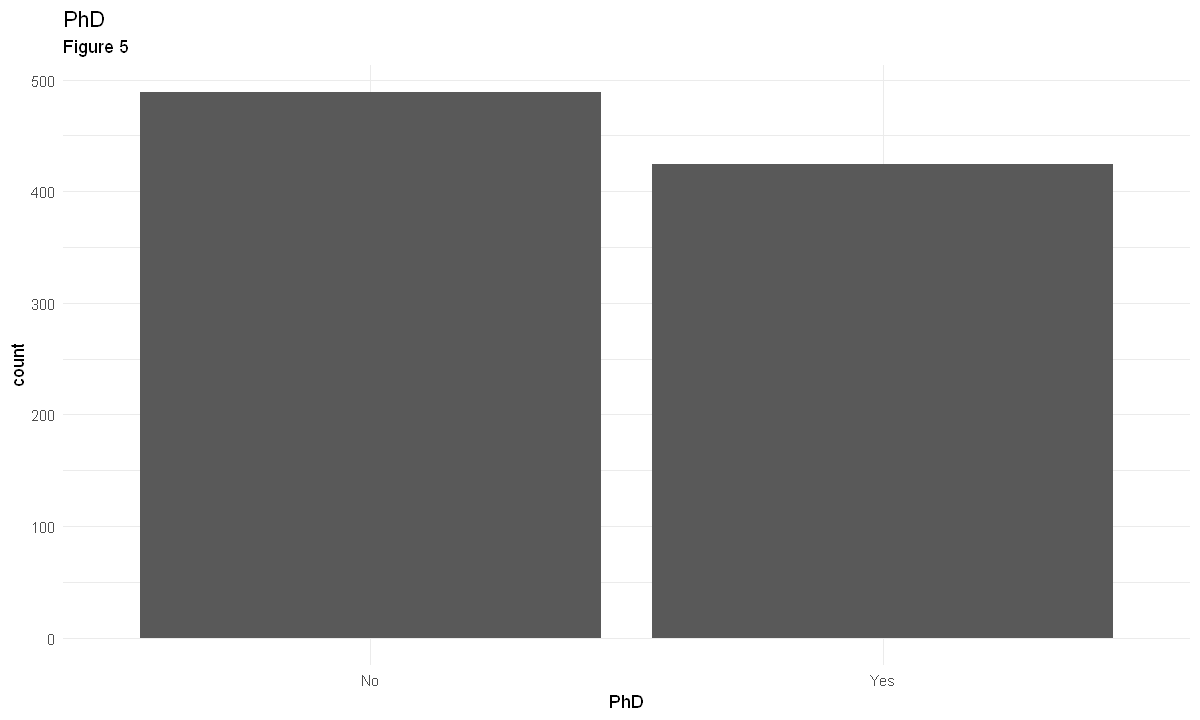

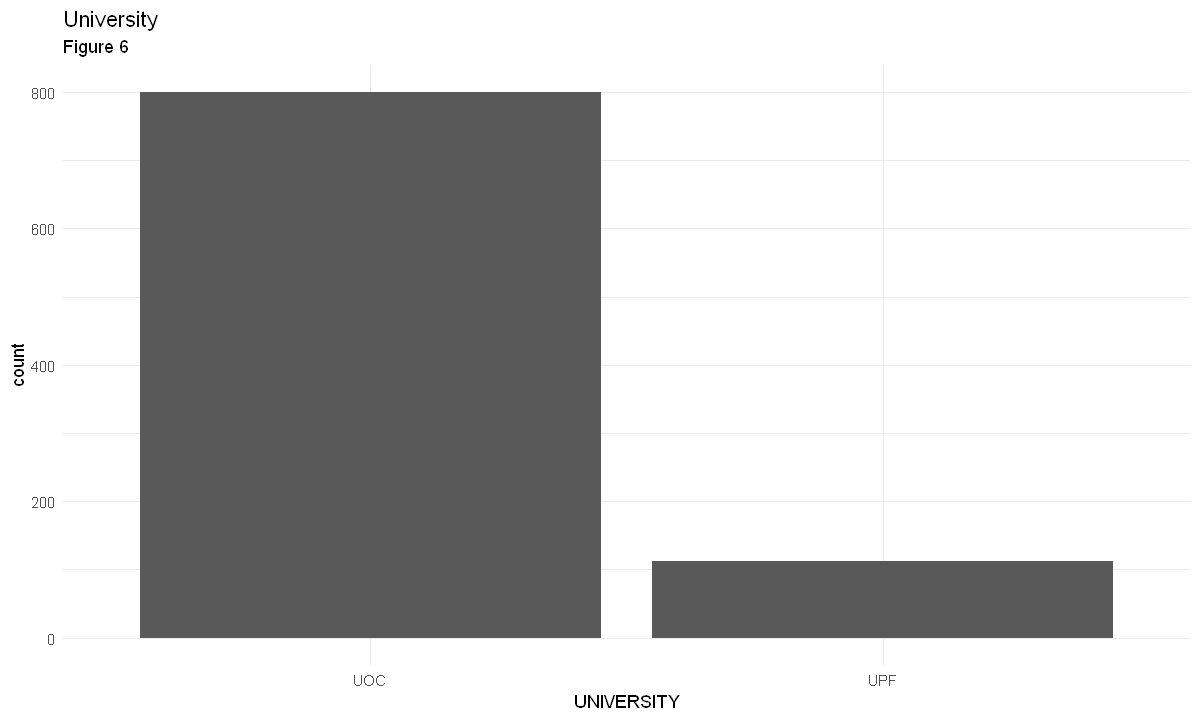

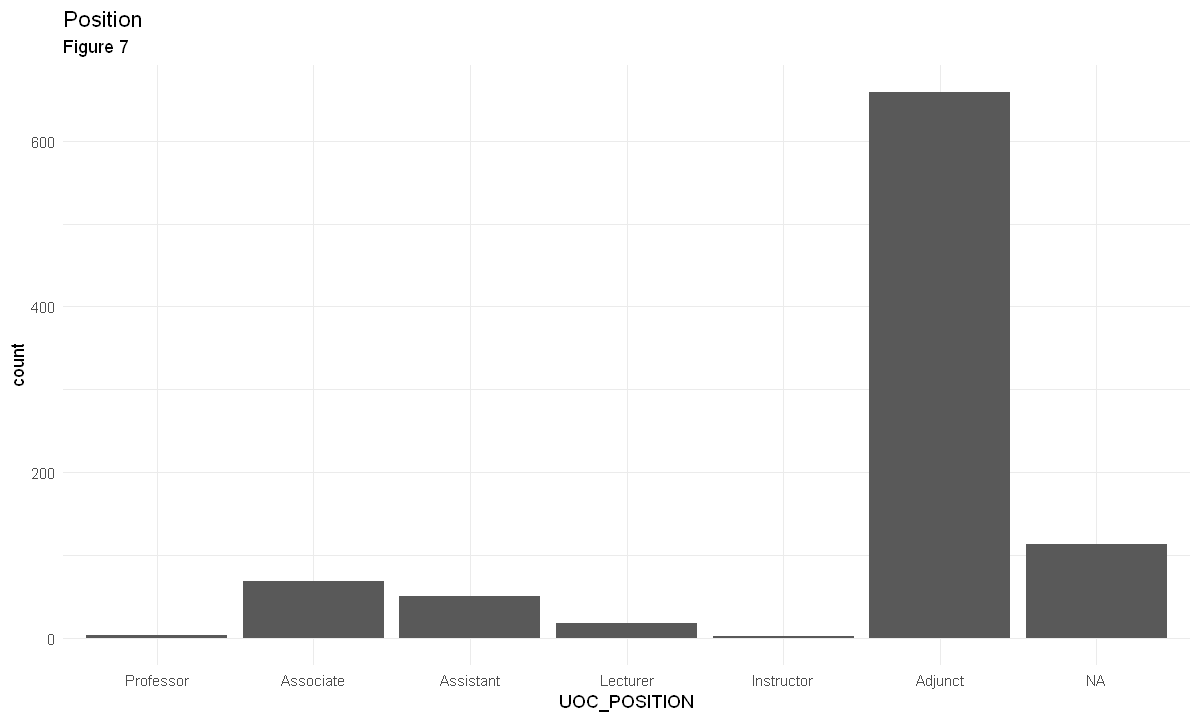

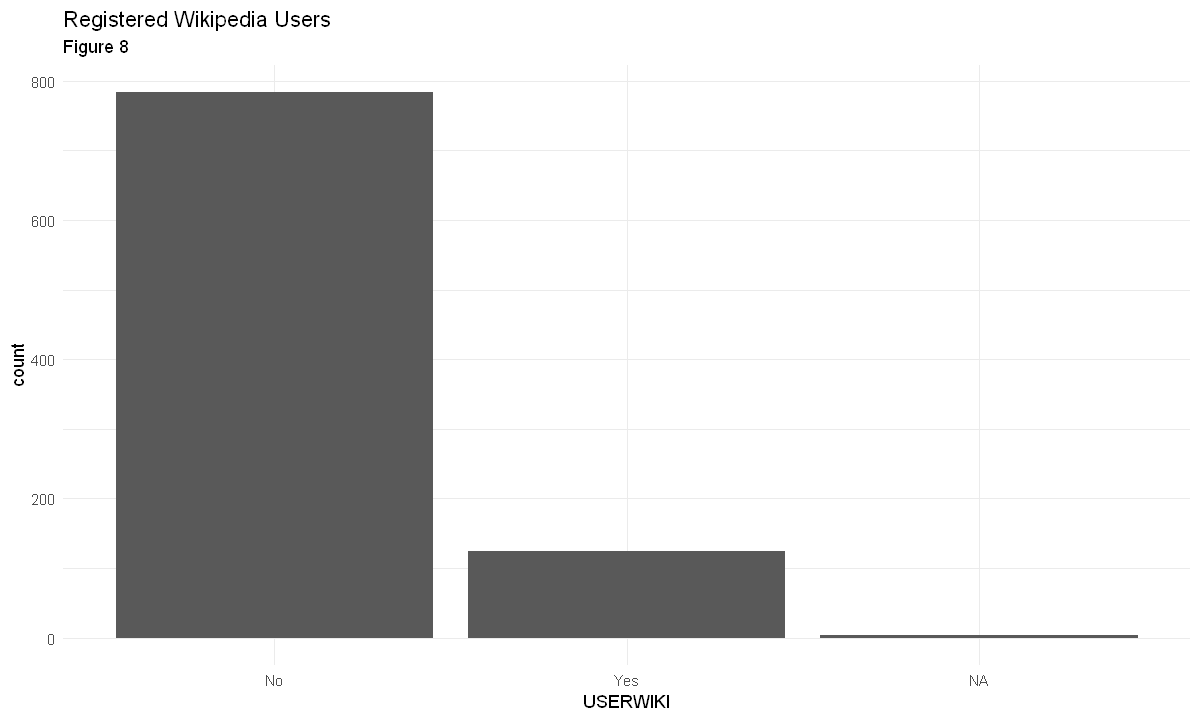

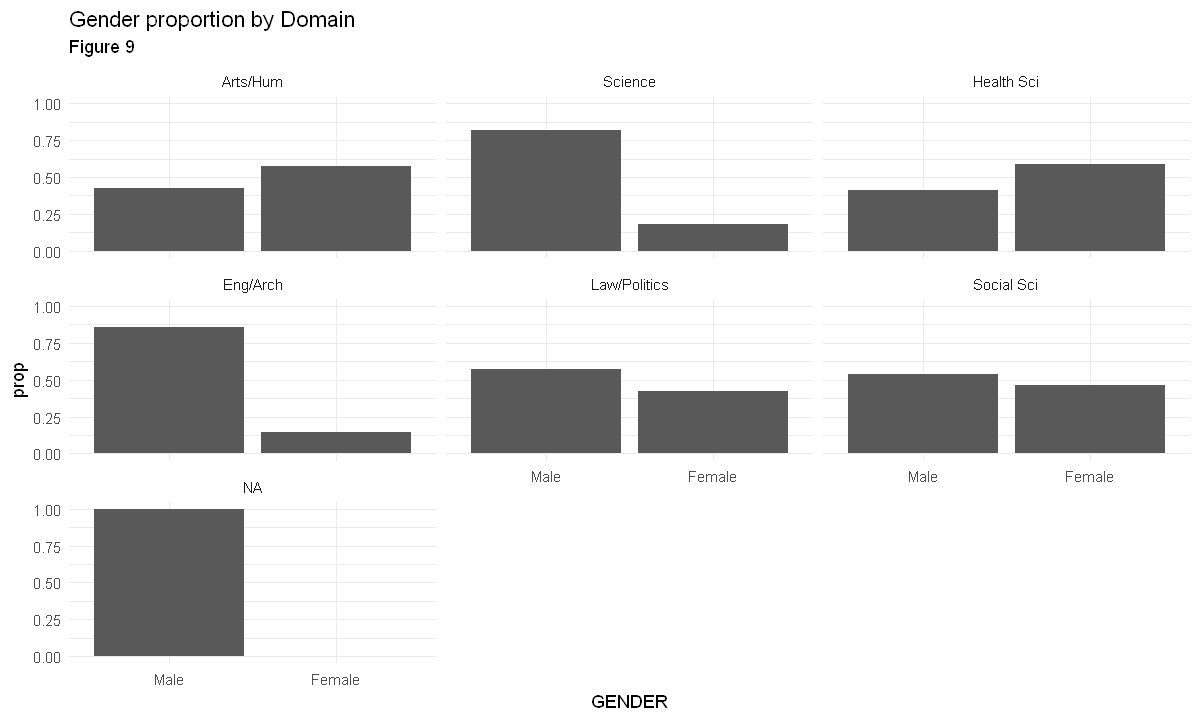

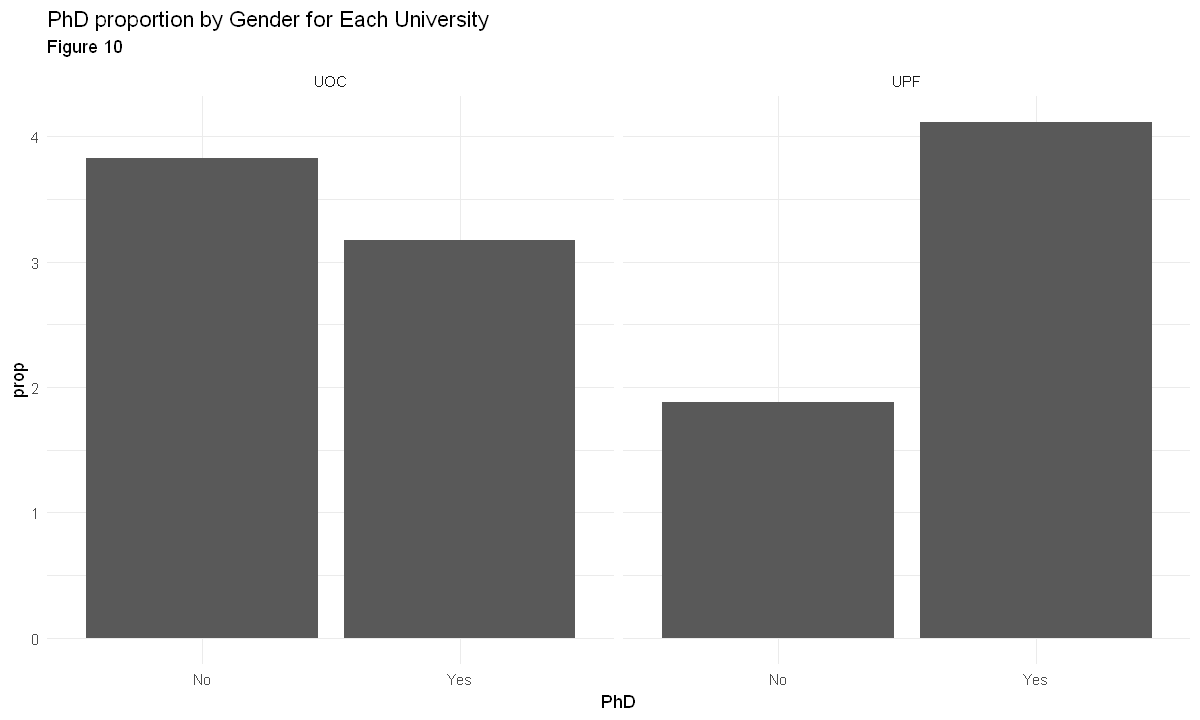

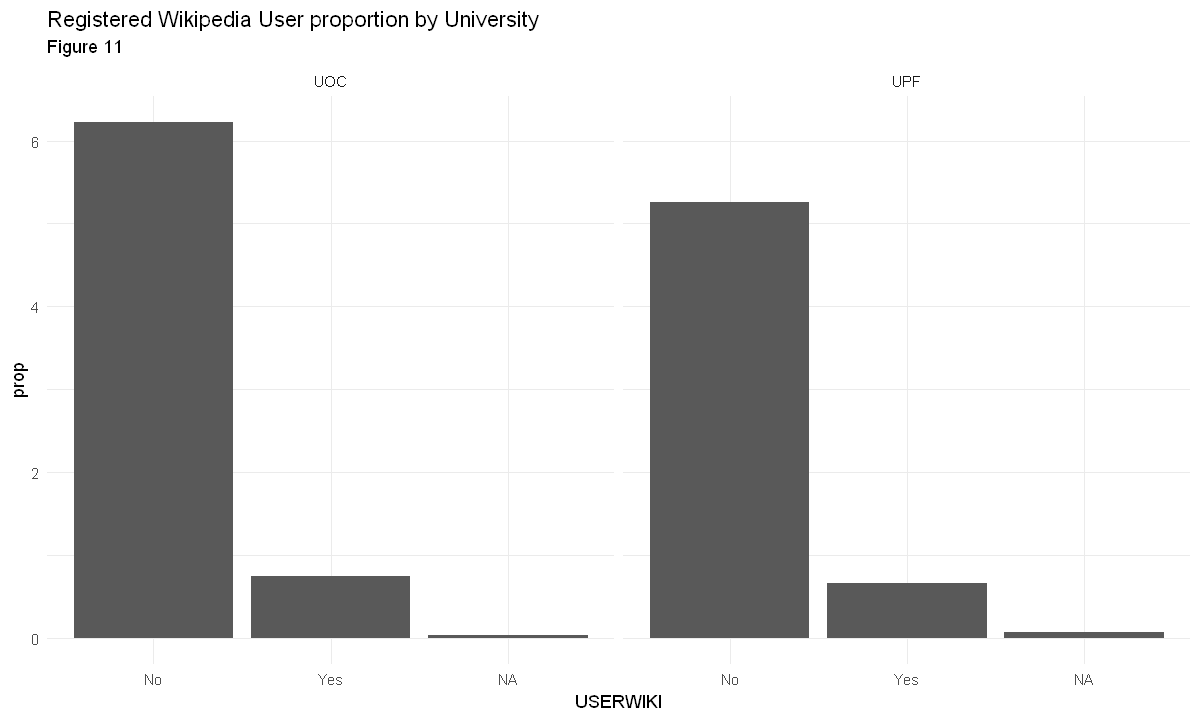

In [143]:
#################################################################################################
# Data Exploration - Summary
#################################################################################################
## Set seed for reproducibility
set.seed(12321)

## Numerical Summary of the the demographic data
summary(wiki[1:10])
summary(wiki[11:43])

## graphical summaries of the demographic data
options(repr.plot.width=10, repr.plot.height=6)
par(mfrow=c(1,1))

hist(wiki$AGE, main="Histogram of Age", sub=expression(paste(italic("Figure 1"))),
     xlab="Age", col="grey")
abline(v=median(wiki$AGE), col='red', lty='solid', lwd=2)
abline(v=mean(wiki$AGE), col='green', lty='dotdash', lwd=2)
abline(v=mean(wiki$AGE)+sd(wiki$AGE), col='pink', lty='solid', lwd=1.75)
abline(v=mean(wiki$AGE)-sd(wiki$AGE), col='pink', lty='solid', lwd=1.75)
legend("topright",legend=c("Median", "Mean", "Standard Deviation"),
       col=c("red", "green", 'pink'),
       lty=c('solid', 'dotdash', 'solid'),
       cex=0.65)

hist(wiki$YEARSEXP, main="Histogram of Years Experience", sub=expression(paste(italic("Figure 2"))),
     xlab="Years Experience", col="grey")
abline(v=median(wiki$YEARSEXP[!is.na(wiki$YEARSEXP)]), col='red', lty='solid', lwd=2)
abline(v=mean(wiki$YEARSEXP[!is.na(wiki$YEARSEXP)]), col='green', lty='dotdash', lwd=2)
abline(v=mean(wiki$YEARSEXP[!is.na(wiki$YEARSEXP)])+sd(wiki$YEARSEXP[!is.na(wiki$YEARSEXP)]),
       col='pink', lty='solid', lwd=1.75)
abline(v=mean(wiki$YEARSEXP[!is.na(wiki$YEARSEXP)])-sd(wiki$YEARSEXP[!is.na(wiki$YEARSEXP)]),
       col='pink', lty='solid', lwd=1.75)
legend("topright",legend=c("Median", "Mean", "Standard Deviation"),
       col=c("red", "green", 'pink'),
       lty=c('solid', 'dotdash', 'solid'),
       cex=0.65)

ggplot(wiki) + 
    geom_bar(aes(x = GENDER)) +
    labs(title = "Gender", subtitle = "Figure 3")

ggplot(wiki) + 
    geom_bar(aes(x = DOMAIN)) +
    labs(title = "Domain", subtitle = "Figure 4")

ggplot(wiki) + 
    geom_bar(aes(x = PhD)) +
    labs(title = "PhD", subtitle = "Figure 5")

ggplot(wiki) + 
    geom_bar(aes(x = UNIVERSITY)) +
    labs(title = "University", subtitle = "Figure 6")

ggplot(wiki) + 
    geom_bar(aes(x = UOC_POSITION)) +
    labs(title = "Position", subtitle = "Figure 7")

ggplot(wiki) + 
    geom_bar(aes(x = USERWIKI)) +
    labs(title = "Registered Wikipedia Users", subtitle = "Figure 8")

ggplot(wiki) + 
    geom_bar(aes(x = GENDER, y = ..prop.., group = DOMAIN)) +
    facet_wrap(~ DOMAIN) + labs(title = "Gender proportion by Domain",
              subtitle = "Figure 9")

ggplot(wiki) + 
    geom_bar(aes(x = PhD, y = ..prop.., group = DOMAIN)) +
    facet_wrap(~ UNIVERSITY) + labs(title = "PhD proportion by Gender for Each University",
              subtitle = "Figure 10")

ggplot(wiki) + 
    geom_bar(aes(x = USERWIKI, y = ..prop.., group = DOMAIN)) +
    facet_wrap(~ UNIVERSITY) + labs(title = "Registered Wikipedia User proportion by University",
              subtitle = "Figure 11")

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.7776 1.51729 1.42634 1.32936 1.22316 1.15050 1.06907
Proportion of Variance 0.2755 0.08222 0.07266 0.06311 0.05343 0.04727 0.04082
Cumulative Proportion  0.2755 0.35775 0.43041 0.49353 0.54696 0.59423 0.63505
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.04307 0.97880 0.87042 0.81937 0.79887 0.75229 0.74131
Proportion of Variance 0.03886 0.03422 0.02706 0.02398 0.02279 0.02021 0.01963
Cumulative Proportion  0.67391 0.70813 0.73518 0.75916 0.78195 0.80216 0.82179
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.70327 0.68667 0.66777 0.66010 0.64140 0.60989 0.58802
Proportion of Variance 0.01766 0.01684 0.01593 0.01556 0.01469 0.01328 0.01235
Cumulative Proportion  0.83946 0.85630 0.87222 0.88778 0.90248 0.91576 0.92811
                         PC22 

      PC1               PC2                PC3               PC4         
 Min.   :-8.6683   Min.   :-4.54443   Min.   :-8.9803   Min.   :-3.2297  
 1st Qu.:-1.9223   1st Qu.:-1.09385   1st Qu.:-0.8860   1st Qu.:-0.8683  
 Median : 0.1927   Median : 0.05133   Median : 0.1476   Median :-0.1043  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 1.8096   3rd Qu.: 1.06445   3rd Qu.: 1.0878   3rd Qu.: 0.7515  
 Max.   : 9.2450   Max.   : 5.58869   Max.   : 3.3168   Max.   : 3.9030  
      PC5                PC6                PC7                PC8          
 Min.   :-4.82560   Min.   :-3.63440   Min.   :-3.96809   Min.   :-4.82510  
 1st Qu.:-0.81192   1st Qu.:-0.69223   1st Qu.:-0.74416   1st Qu.:-0.64194  
 Median :-0.07273   Median :-0.01845   Median : 0.02243   Median : 0.02271  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.73054   3rd Qu.: 0.68671   3rd Qu.: 0.71941   3rd Qu.: 0.67055  
 Max.   : 4.82198   

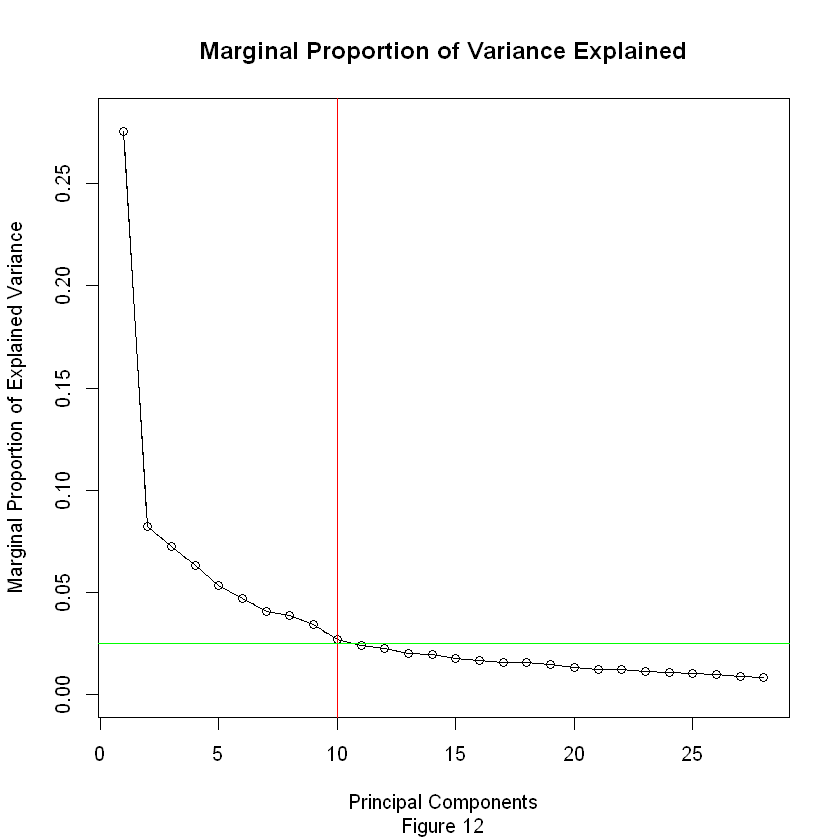

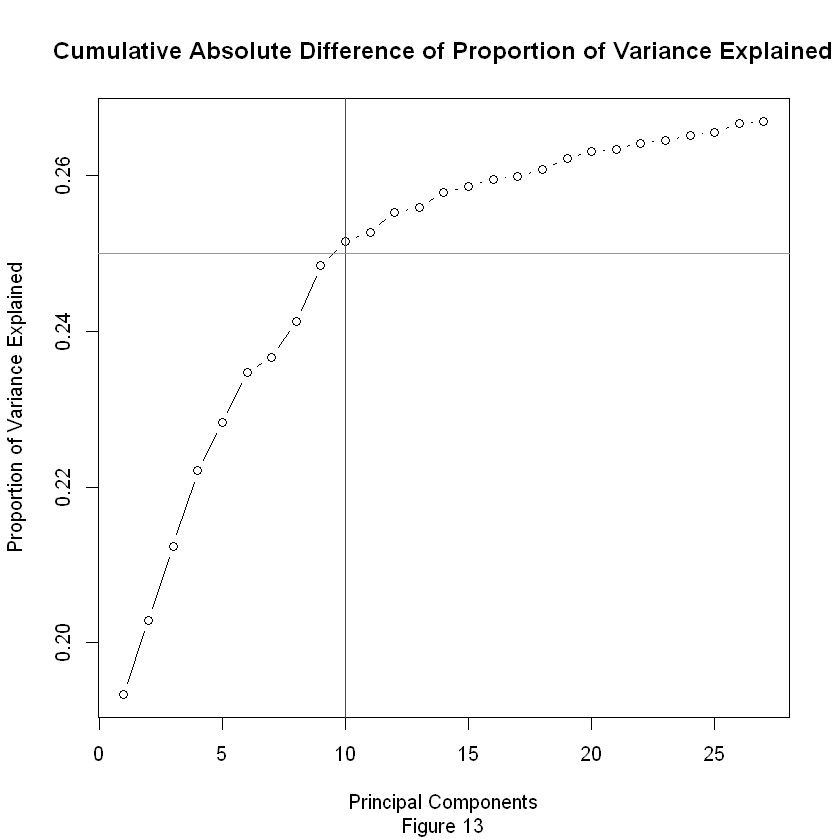

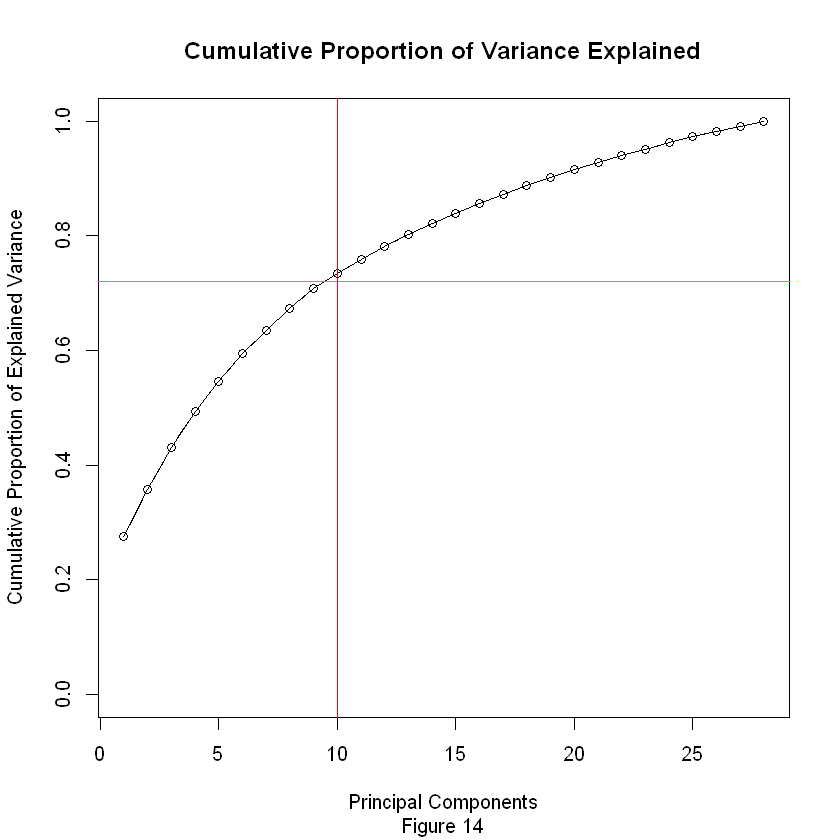

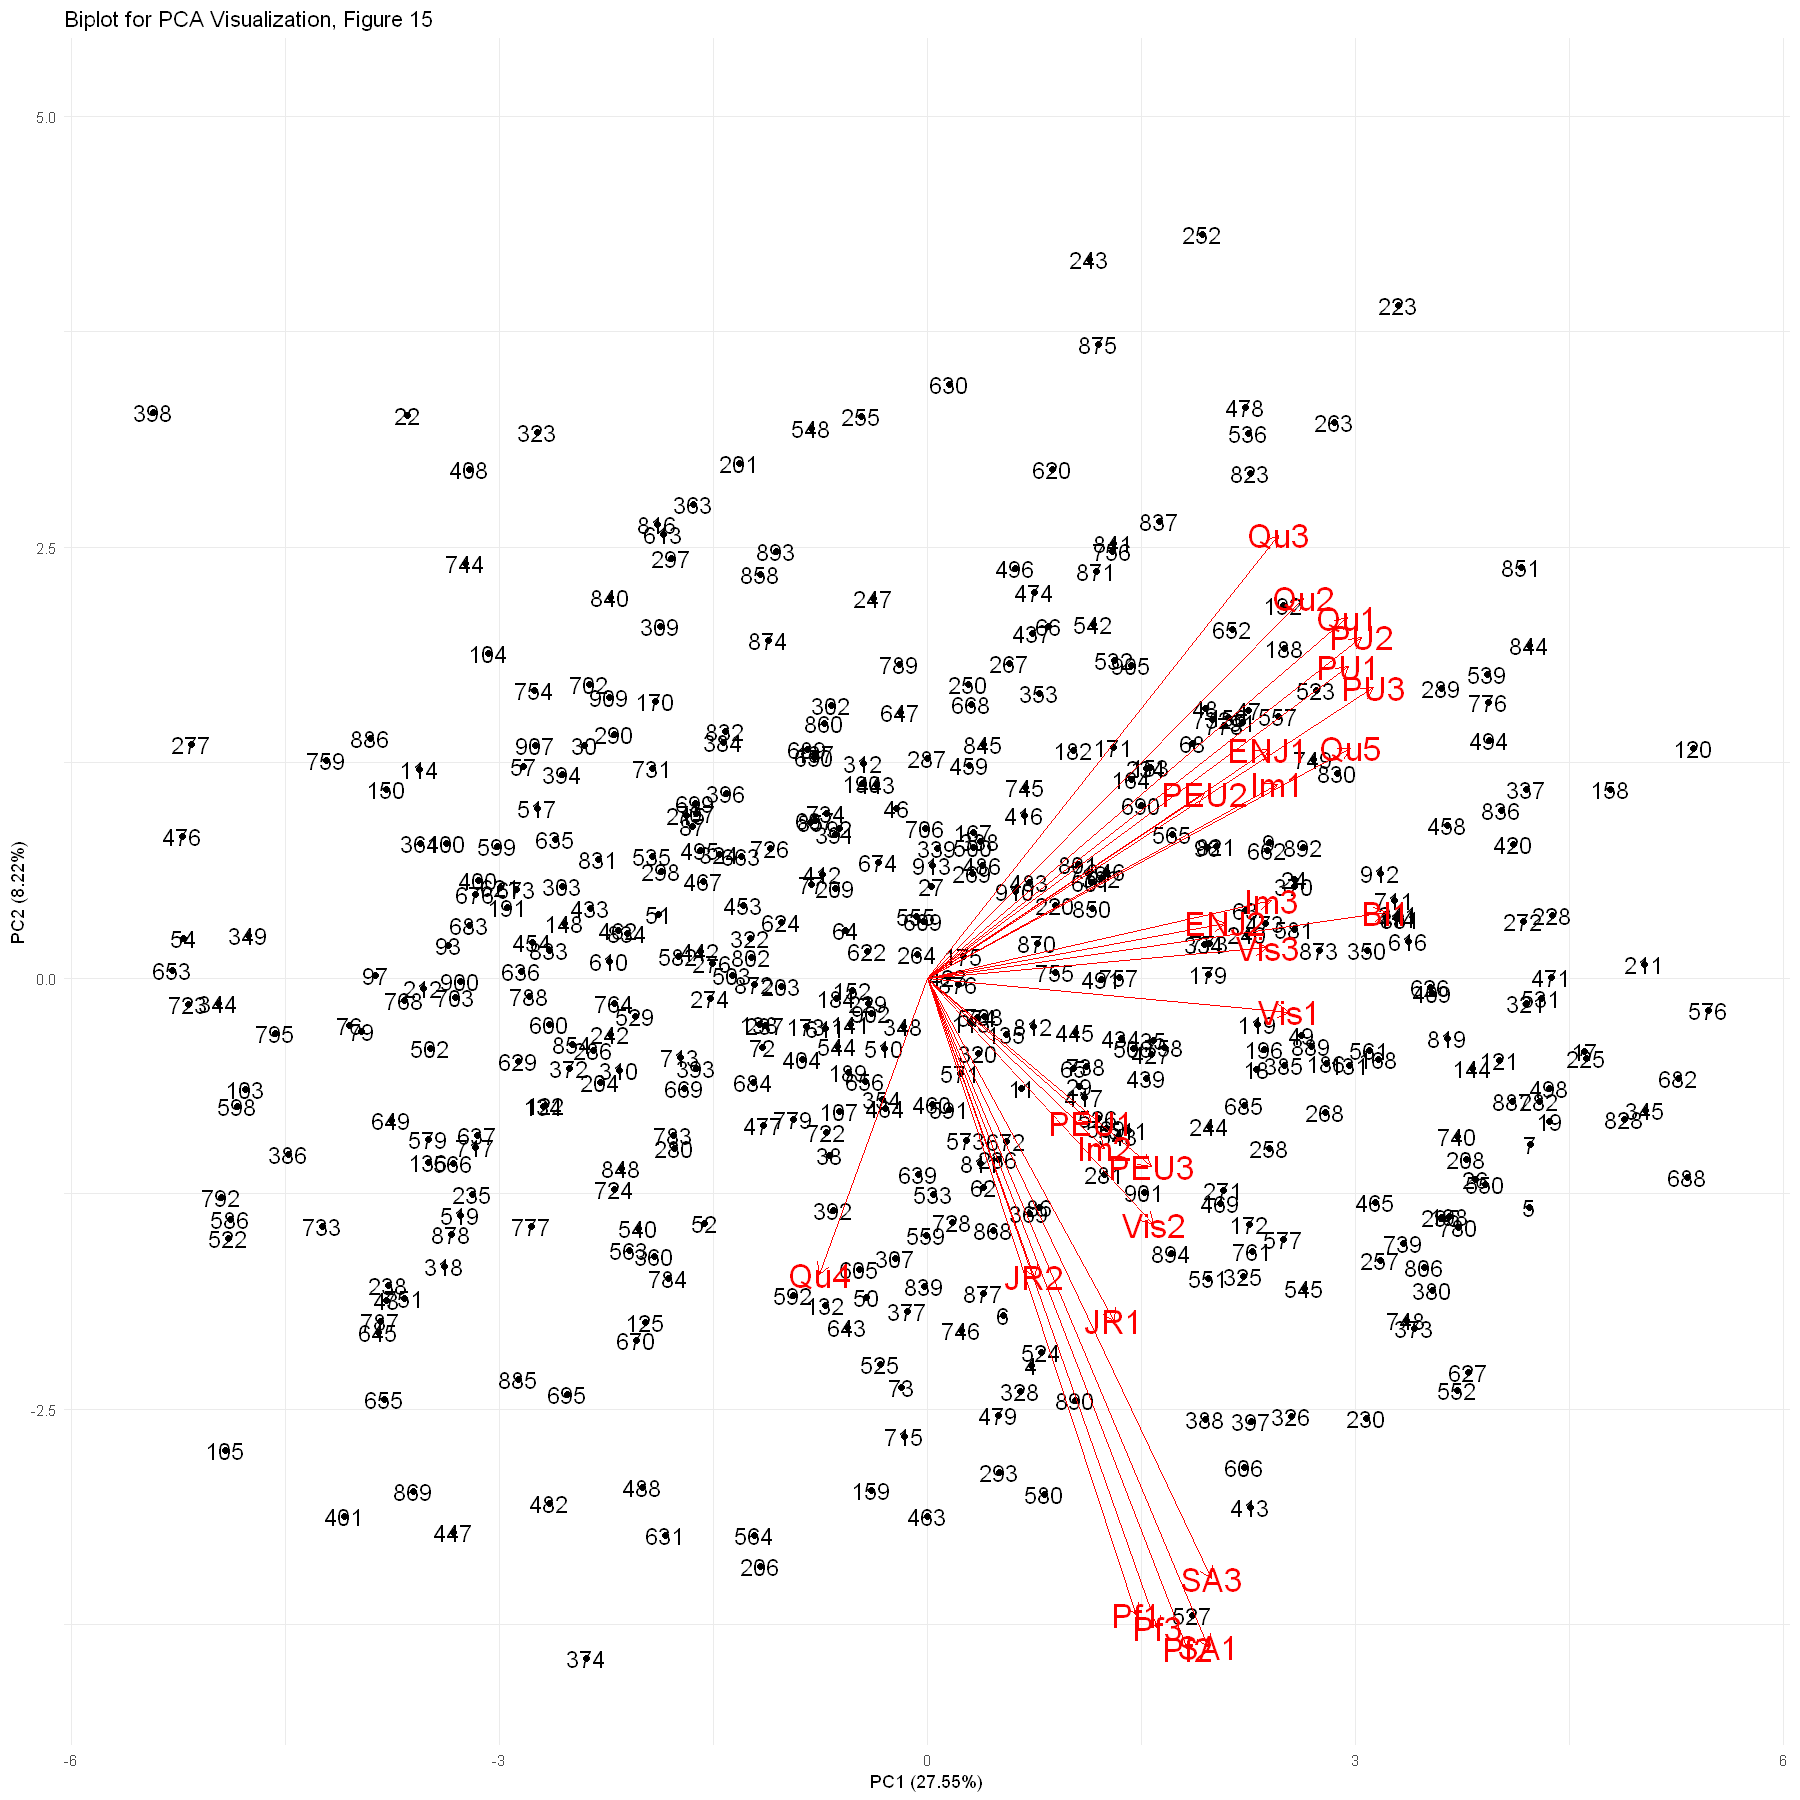

In [144]:
#################################################################################################
# Data Exploration: PCA
#################################################################################################
## Set seed for reproducibility
set.seed(12321)

suppressPackageStartupMessages(library(MASS, warn.conflicts=FALSE))
options(repr.plot.width=7, repr.plot.height=7)

## Predictors list
predictors <- c('PU1','PU2','PU3','PEU1','PEU2','PEU3','ENJ1','ENJ2','Qu1','Qu2',
                'Qu3','Qu4','Qu5','Vis1','Vis2','Vis3','Im1','Im2','Im3','SA1',
                'SA2','SA3','Pf1','Pf2','Pf3','JR1','JR2','BI1')

## Perform PCA on the survey items
scaled.wiki <- scale(train.data[predictors], center=TRUE)
pca.output <- prcomp(scaled.wiki, scale=FALSE)
scaled.wiki.test <- scale(test.data[predictors], center=TRUE)
pca.output.test <- predict(pca.output, scaled.wiki.test)
summary(pca.output)
summary(pca.output.test)

# find out the proportion of variance explained by each principal component and the cumulative sum
pca.var.explained <- pca.output$sdev^2
pca.prop.var.explained <- pca.var.explained/(sum(pca.var.explained))

# plot the proportion of variance explained by each principal component
plot((pca.prop.var.explained),
     main="Marginal Proportion of Variance Explained",
     sub="Figure 12",
     xlab="Principal Components",
     ylab="Marginal Proportion of Explained Variance",
     ylim=(c(0, max(pca.prop.var.explained)+0.005)),
     type='b')
lines(pca.prop.var.explained)
abline(v=10, col='red')
abline(h=0.025, col='green')

plot(cumsum(abs(diff(pca.prop.var.explained))),
     main="Cumulative Absolute Difference of Proportion of Variance Explained",
     sub="Figure 13",
     xlab="Principal Components",
     ylab="Proportion of Variance Explained",
     type='b')
abline(v=10, col='red')
abline(h=0.25, col='green')


# plot the cumulative proportion of variance explained by each principal component
plot(cumsum(pca.prop.var.explained),
     main="Cumulative Proportion of Variance Explained",
     sub="Figure 14",
     xlab="Principal Components",
     ylab="Cumulative Proportion of Explained Variance",
     ylim=c(0,1),
     type='b')
lines(cumsum(pca.prop.var.explained))
abline(h=0.72, col='green')
abline(v=10, col='red')

## Plot Biplot
library(ggfortify)
options(repr.plot.width=15, repr.plot.height=15)
set.seed(123456)
options(warn=-1)
autoplot(prcomp(scaled.wiki, scale=FALSE),
         label = TRUE, label.size = 5, loadings=TRUE,
         loadings.label = TRUE, loadings.label.size = 7, scale=0, xlim=c(-5.5, 5.5),ylim=c(-4, 5),
         main="Biplot for PCA Visualization, Figure 15")

options(warn=0)

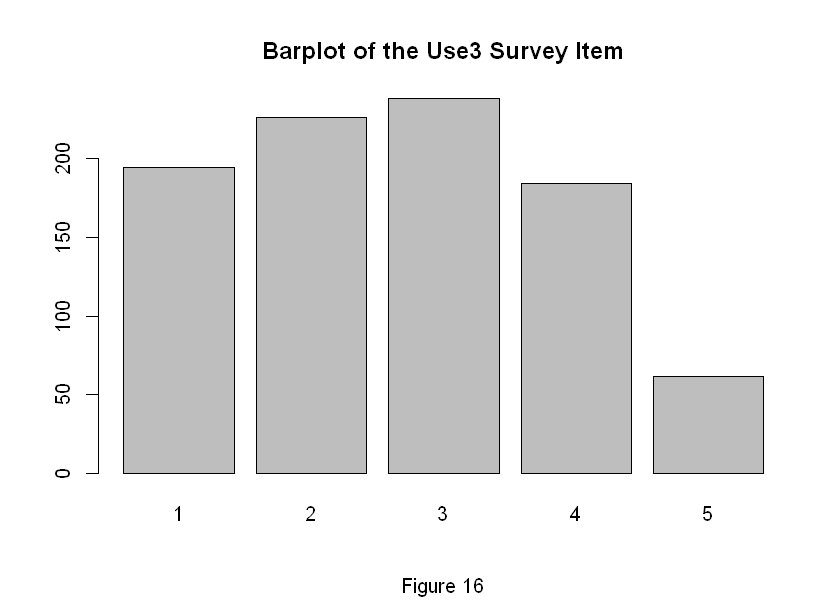

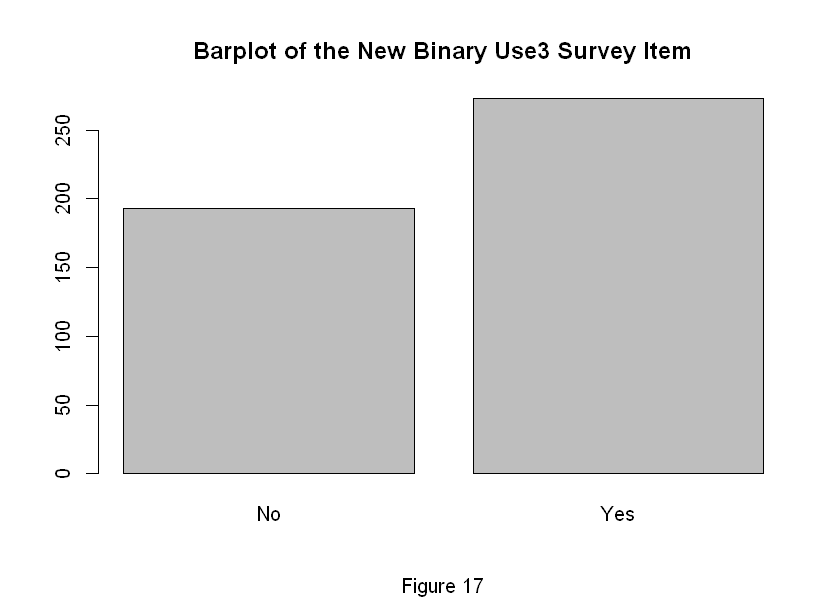

In [145]:
#################################################################################################
# Data Modeling: Data Prep
#################################################################################################
## Set seed for reproducibility
set.seed(12321)

options(repr.plot.width=7, repr.plot.height=5)

plot(new.use3, main="Barplot of the Use3 Survey Item", sub = "Figure 16")
predictor.data <- pca.output$x[, 1:15]
predictor.data <- cbind(predictor.data, train.data[1:10])
predictor.data$Use3 <- train.data$Use3
predictor.data <- predictor.data[!is.na(predictor.data$Use3),]
predictor.data$Use3 <- factor(ifelse(predictor.data$Use3 >= 3, "Yes", "No"), levels=c("No","Yes"))
plot(predictor.data$Use3, main="Barplot of the New Binary Use3 Survey Item", sub = "Figure 17")

## Create additional variables
predictor.data$AGE.YEARSEXP = predictor.data$YEARSEXP / predictor.data$AGE
predictor.data$AGE.diff.YEARSEXP = predictor.data$AGE - predictor.data$YEARSEXP
predictor.data$GENDER.PhD = with(predictor.data,interaction(GENDER, PhD))
predictor.data$UNIVERSITY.PhD = with(predictor.data,interaction(UNIVERSITY, PhD))
predictor.data$DOMAIN.GENDER = with(predictor.data,interaction(DOMAIN, GENDER))
predictor.data$UNIVERSITY.GENDER = with(predictor.data,interaction(UNIVERSITY, GENDER))
predictor.data$PC1.PC2 = predictor.data$PC1 * predictor.data$PC2
predictor.data$PC1.PC3 = predictor.data$PC1 * predictor.data$PC3
predictor.data$PC2.PC3 = predictor.data$PC2 * predictor.data$PC3


## now for test data
predictor.data.test <- pca.output.test[,1:15]
predictor.data.test <- cbind(predictor.data.test, test.data[1:10])
predictor.data.test$Use3 <- test.data$Use3
predictor.data.test <- predictor.data.test[!is.na(predictor.data.test$Use3),]
predictor.data.test$Use3 <- factor(ifelse(predictor.data.test$Use3 >= 3, "Yes", "No"), levels=c("No","Yes"))

## Create additional variables
predictor.data.test$AGE.YEARSEXP = predictor.data.test$YEARSEXP / predictor.data.test$AGE
predictor.data.test$AGE.diff.YEARSEXP = predictor.data.test$AGE - predictor.data.test$YEARSEXP
predictor.data.test$GENDER.PhD = with(predictor.data.test,interaction(GENDER, PhD))
predictor.data.test$UNIVERSITY.PhD = with(predictor.data.test,interaction(UNIVERSITY, PhD))
predictor.data.test$DOMAIN.GENDER = with(predictor.data.test,interaction(DOMAIN, GENDER))
predictor.data.test$UNIVERSITY.GENDER = with(predictor.data.test,interaction(UNIVERSITY, GENDER))
predictor.data.test$PC1.PC2 = predictor.data.test$PC1 * predictor.data.test$PC2
predictor.data.test$PC1.PC3 = predictor.data.test$PC1 * predictor.data.test$PC3
predictor.data.test$PC2.PC3 = predictor.data.test$PC2 * predictor.data.test$PC3

In [146]:
#################################################################################################
# Data Modeling: Logistic Regression
#################################################################################################
set.seed(123321)

fit <- glm(Use3 ∼ ., data=predictor.data, family=binomial)
step.model <- step(fit, trace=0, direction = "both", steps=1000)
(step.model$formula)
fit <- glm(formula=step.model$formula ,data=predictor.data, family=binomial)

# Summary
(summary(fit))
# train fit
logistic.prediction.probs <- predict(fit, type="response")
logistic.predictions <- rep("No",nrow(predictor.data))
logistic.predictions[logistic.prediction.probs>.5]="Yes"
# Confusion matrix
(train.table <- table("Actual"=predictor.data$Use3, "Preds"=logistic.predictions))
# Classificaiton metrics
paste("Training - Correct Classification Rate: ", (train.table[1,1]+train.table[2,2])/(nrow(predictor.data)))
paste("Training - Misclassification Rate: ", 1-(train.table[1,1]+train.table[2,2])/(nrow(predictor.data)))
paste("Training - Specificity: ", (train.table[1,1])/(train.table[1,1]+train.table[1,2]))
paste("Training - Sensitvity: ", (train.table[2,2])/(train.table[2,2]+train.table[2,1]))
paste("Training - Positive Predictive Value: ", (train.table[2,2])/(train.table[1,2]+train.table[2,2]))
paste("Training - Negative Predictive Value: ", (train.table[1,1])/(train.table[1,1]+train.table[2,1]))

# test Prediction
logistic.prediction.probs <- predict(fit, type="response", predictor.data.test)
logistic.predictions <- rep("No",nrow(predictor.data.test))
logistic.predictions[logistic.prediction.probs>.5]="Yes"
# Confusion matrix
(test.table <- table("Actual"=predictor.data.test$Use3, "Preds"=logistic.predictions))

# Classificaiton metrics
paste("Testing - Correct Classification Rate: ", (test.table[1,1]+test.table[2,2])/(nrow(predictor.data.test)))
paste("Testing - Misclassification Rate: ", 1-(test.table[1,1]+test.table[2,2])/(nrow(predictor.data.test)))
paste("Testing - Specificity: ", (test.table[1,1])/(test.table[1,1]+test.table[1,2]))
paste("Testing - Sensitvity: ", (test.table[2,2])/(test.table[2,2]+test.table[2,1]))
paste("Testing - Positive Predictive Value: ", (test.table[2,2])/(test.table[1,2]+test.table[2,2]))
paste("Testing - Negative Predictive Value: ", (test.table[1,1])/(test.table[1,1]+test.table[2,1]))

Use3 ~ PC1 + PC2 + PC3 + PC5 + PC7 + PC8 + PC11 + PC12 + OTHERSTATUS + 
    AGE.YEARSEXP + DOMAIN.GENDER + PC1.PC2 + PC2.PC3


Call:
glm(formula = step.model$formula, family = binomial, data = predictor.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2126  -0.4027   0.0727   0.4510   2.6586  

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         0.67333    1.10229   0.611 0.541303    
PC1                                 1.04233    0.10852   9.605  < 2e-16 ***
PC2                                 0.17411    0.10611   1.641 0.100810    
PC3                                -0.37900    0.11124  -3.407 0.000657 ***
PC5                                 0.43776    0.13563   3.228 0.001248 ** 
PC7                                -0.58154    0.15287  -3.804 0.000142 ***
PC8                                -0.57320    0.16834  -3.405 0.000662 ***
PC11                               -0.46475    0.19604  -2.371 0.017754 *  
PC12                               -0.35950    0.21036  -1.709 0.087453 .  
OTHERSTATUSAssociate        

      Preds
Actual  No Yes
   No  158  35
   Yes  29 244

[1] "Training - Correct Classification Rate:  0.862660944206009"

[1] "Training - Misclassification Rate:  0.137339055793991"

[1] "Training - Specificity:  0.818652849740933"

[1] "Training - Sensitvity:  0.893772893772894"

[1] "Training - Positive Predictive Value:  0.874551971326165"

[1] "Training - Negative Predictive Value:  0.844919786096257"

      Preds
Actual  No Yes
   No  152  75
   Yes  17 194

[1] "Testing - Correct Classification Rate:  0.789954337899543"

[1] "Testing - Misclassification Rate:  0.210045662100457"

[1] "Testing - Specificity:  0.669603524229075"

[1] "Testing - Sensitvity:  0.919431279620853"

[1] "Testing - Positive Predictive Value:  0.721189591078067"

[1] "Testing - Negative Predictive Value:  0.899408284023669"

Call:
lda(Use3 ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC7 + PC8 + PC11 + PC12 + 
    GENDER + AGE, data = predictor.data)

Prior probabilities of groups:
       No       Yes 
0.4141631 0.5858369 

Group means:
          PC1        PC2        PC3         PC4         PC5        PC7
No  -2.042240 -0.2063825  0.2959716 -0.03934931 -0.10113783  0.1701173
Yes  1.434557  0.1421769 -0.2134563  0.03091676  0.07270438 -0.1173414
            PC8        PC11        PC12 GENDERFemale      AGE
No   0.07073553  0.07246129  0.04746583    0.5284974 42.46114
Yes -0.05352069 -0.05984496 -0.04098210    0.3479853 42.16117

Coefficients of linear discriminants:
                      LD1
PC1           0.435735194
PC2           0.145526024
PC3          -0.233320292
PC4           0.035109321
PC5           0.111848014
PC7          -0.237531489
PC8          -0.118948647
PC11         -0.191150981
PC12         -0.148797193
GENDERFemale -0.250007458
AGE          -0.004343579

[1] "Prior, unconditioned probability of Down: 0.414163090128755"

[1] "Prior, unconditioned probability of Up: 0.585836909871245"

      Preds
Actual  No Yes
   No  157  36
   Yes  39 234

[1] "Training - Correct Classification Rate:  0.839055793991416"

[1] "Training - Misclassification Rate:  0.160944206008584"

[1] "Training - Specificity:  0.813471502590674"

[1] "Training - Sensitvity:  0.857142857142857"

[1] "Training - Positive Predictive Value:  0.866666666666667"

[1] "Training - Negative Predictive Value:  0.801020408163265"

      Preds
Actual  No Yes
   No  168  59
   Yes  14 197

[1] "Testing - Correct Classification Rate:  0.833333333333333"

[1] "Testing - Misclassification Rate:  0.166666666666667"

[1] "Testing - Specificity:  0.740088105726872"

[1] "Testing - Sensitvity:  0.933649289099526"

[1] "Testing - Positive Predictive Value:  0.76953125"

[1] "Testing - Negative Predictive Value:  0.923076923076923"

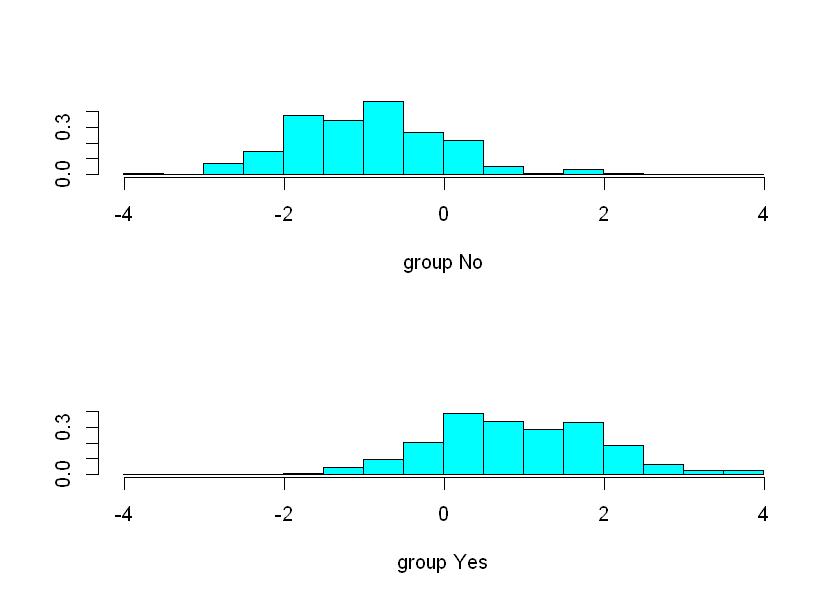

In [121]:
#################################################################################################
# Data Modeling: Linear Discriminant Analysis
#################################################################################################
## Fit model
lda.model <- lda(Use3 ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC7 + PC8 + PC11 + PC12 + GENDER + AGE,
                 data=predictor.data)

## Summary
(lda.model)

## Plot
plot(lda.model)

paste("Prior, unconditioned probability of Down:", lda.model$prior[1])
paste("Prior, unconditioned probability of Up:", lda.model$prior[2])

# train fit
lda.predictions <- predict(lda.model, predictor.data)

# Confusion matrix
(train.table <- table("Actual"=predictor.data$Use3, "Preds"=lda.predictions$class))

# Classificaiton metrics
paste("Training - Correct Classification Rate: ", (train.table[1,1]+train.table[2,2])/(nrow(predictor.data)))
paste("Training - Misclassification Rate: ", 1-(train.table[1,1]+train.table[2,2])/(nrow(predictor.data)))
paste("Training - Specificity: ", (train.table[1,1])/(train.table[1,1]+train.table[1,2]))
paste("Training - Sensitvity: ", (train.table[2,2])/(train.table[2,2]+train.table[2,1]))
paste("Training - Positive Predictive Value: ", (train.table[2,2])/(train.table[1,2]+train.table[2,2]))
paste("Training - Negative Predictive Value: ", (train.table[1,1])/(train.table[1,1]+train.table[2,1]))

# test Prediction
lda.predictions <- predict(lda.model, predictor.data.test)

# Confusion matrix
(test.table <- table("Actual"=predictor.data.test$Use3, "Preds"=lda.predictions$class))

# Classificaiton metrics
paste("Testing - Correct Classification Rate: ", (test.table[1,1]+test.table[2,2])/(nrow(predictor.data.test)))
paste("Testing - Misclassification Rate: ", 1-(test.table[1,1]+test.table[2,2])/(nrow(predictor.data.test)))
paste("Testing - Specificity: ", (test.table[1,1])/(test.table[1,1]+test.table[1,2]))
paste("Testing - Sensitvity: ", (test.table[2,2])/(test.table[2,2]+test.table[2,1]))
paste("Testing - Positive Predictive Value: ", (test.table[2,2])/(test.table[1,2]+test.table[2,2]))
paste("Testing - Negative Predictive Value: ", (test.table[1,1])/(test.table[1,1]+test.table[2,1]))

In [203]:
#################################################################################################
# Data Modeling: Quadratic Discriminant Analysis
#################################################################################################

## Fit model
qda.model <- qda(Use3 ~ PC1.PC2 * PC2.PC3 + PC1 + PC2 + PC3 + PC4 + PC7 + PC8 +
                 AGE+GENDER*UNIVERSITY+PhD,
                 data=predictor.data)

## Summary
(qda.model)

paste("Prior, unconditioned probability of Down:", qda.model$prior[1])
paste("Prior, unconditioned probability of Up:", qda.model$prior[2])

# train fit
qda.predictions <- predict(qda.model, predictor.data)

# Confusion matrix
(train.table <- table("Actual"=predictor.data$Use3, "Preds"=qda.predictions$class))

# Classificaiton metrics
paste("Training - Correct Classification Rate: ", (train.table[1,1]+train.table[2,2])/(nrow(predictor.data)))
paste("Training - Misclassification Rate: ", 1-(train.table[1,1]+train.table[2,2])/(nrow(predictor.data)))
paste("Training - Specificity: ", (train.table[1,1])/(train.table[1,1]+train.table[1,2]))
paste("Training - Sensitvity: ", (train.table[2,2])/(train.table[2,2]+train.table[2,1]))
paste("Training - Positive Predictive Value: ", (train.table[2,2])/(train.table[1,2]+train.table[2,2]))
paste("Training - Negative Predictive Value: ", (train.table[1,1])/(train.table[1,1]+train.table[2,1]))

# test Prediction
qda.predictions <- predict(qda.model, predictor.data.test)

# Confusion matrix
(test.table <- table("Actual"=predictor.data.test$Use3, "Preds"=qda.predictions$class))

# Classificaiton metrics
paste("Testing - Correct Classification Rate: ", (test.table[1,1]+test.table[2,2])/(nrow(predictor.data.test)))
paste("Testing - Misclassification Rate: ", 1-(test.table[1,1]+test.table[2,2])/(nrow(predictor.data.test)))
paste("Testing - Specificity: ", (test.table[1,1])/(test.table[1,1]+test.table[1,2]))
paste("Testing - Sensitvity: ", (test.table[2,2])/(test.table[2,2]+test.table[2,1]))
paste("Testing - Positive Predictive Value: ", (test.table[2,2])/(test.table[1,2]+test.table[2,2]))
paste("Testing - Negative Predictive Value: ", (test.table[1,1])/(test.table[1,1]+test.table[2,1]))

Call:
qda(Use3 ~ PC1.PC2 * PC2.PC3 + PC1 + PC2 + PC3 + PC4 + PC7 + 
    PC8 + AGE + GENDER * UNIVERSITY + PhD, data = predictor.data)

Prior probabilities of groups:
       No       Yes 
0.4141631 0.5858369 

Group means:
       PC1.PC2    PC2.PC3       PC1        PC2        PC3         PC4
No   0.5195476 -0.2637393 -2.042240 -0.2063825  0.2959716 -0.03934931
Yes -0.3674579  0.1851515  1.434557  0.1421769 -0.2134563  0.03091676
           PC7         PC8      AGE GENDERFemale UNIVERSITYUPF    PhDYes
No   0.1701173  0.07073553 42.46114    0.5284974    0.09326425 0.4974093
Yes -0.1173414 -0.05352069 42.16117    0.3479853    0.15384615 0.4432234
    PC1.PC2:PC2.PC3 GENDERFemale:UNIVERSITYUPF
No        3.3724910                 0.05699482
Yes       0.3778475                 0.05128205

[1] "Prior, unconditioned probability of Down: 0.414163090128755"

[1] "Prior, unconditioned probability of Up: 0.585836909871245"

      Preds
Actual  No Yes
   No  139  54
   Yes  20 253

[1] "Training - Correct Classification Rate:  0.841201716738197"

[1] "Training - Misclassification Rate:  0.158798283261803"

[1] "Training - Specificity:  0.72020725388601"

[1] "Training - Sensitvity:  0.926739926739927"

[1] "Training - Positive Predictive Value:  0.824104234527687"

[1] "Training - Negative Predictive Value:  0.874213836477987"

      Preds
Actual  No Yes
   No  143  84
   Yes  21 190

[1] "Testing - Correct Classification Rate:  0.76027397260274"

[1] "Testing - Misclassification Rate:  0.23972602739726"

[1] "Testing - Specificity:  0.629955947136564"

[1] "Testing - Sensitvity:  0.900473933649289"

[1] "Testing - Positive Predictive Value:  0.693430656934307"

[1] "Testing - Negative Predictive Value:  0.871951219512195"